In [1]:
import selenium
from selenium import webdriver
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from scipy.stats import *
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [13]:
data = pd.read_csv('./final/(0423)진짜 최종.csv')

In [14]:
data_raw= data.copy()

In [15]:
data = data.drop('Unnamed: 0',axis=1)

In [16]:
data

,산지,최종수량,year,month,day,1kg price,date2,temp
0,통영,254.0,2006,4,5,3200.00,2006.04.05,12.075
1,통영,535.2,2006,4,5,4000.00,2006.04.05,12.075
2,통영,70.0,2006,4,5,4285.71,2006.04.05,12.075
3,통영,194.7,2006,4,5,4454.55,2006.04.05,12.075
4,통영,493.0,2006,4,5,3941.18,2006.04.05,12.075
...,...,...,...,...,...,...,...,...
65512,삼천포,2.0,2021,4,2,3100.00,2021.04.02,13.150
65513,삼천포,3.6,2021,4,2,7833.33,2021.04.02,13.150
65514,삼천포,22.8,2021,4,5,6894.74,2021.04.05,13.325
65515,삼천포,30.0,2021,4,6,6700.00,2021.04.06,13.350


In [22]:
data_lr = data[['산지','최종수량','1kg price','temp','date2']]

In [23]:
data_lr.columns = ['from','qty','1kg price','temp','date']

In [28]:
grouped=data_lr.groupby('date').agg({'qty':'sum','1kg price':'mean','temp':'mean'}).round(2)

In [100]:
grouped.to_csv('./final/(0425)그룹화 최종.csv')

In [101]:
grouped

,qty,1kg price,temp,temp_sc,qty_sc
date,,,,,
2006.04.04,978.3,4948.71,12.02,-0.853048,-0.652525
2006.04.05,4600.7,4447.32,11.90,-0.876107,0.042461
2006.04.06,3842.2,4620.74,12.12,-0.833833,-0.103063
2006.04.07,4777.3,4060.83,12.18,-0.822304,0.076343
2006.04.08,4773.5,4547.00,12.17,-0.824225,0.075614
...,...,...,...,...,...
2021.04.03,561.4,4642.59,13.30,-0.607090,-0.732510
2021.04.05,421.1,5653.34,13.32,-0.603247,-0.759428
2021.04.06,290.7,7392.06,13.35,-0.597483,-0.784446


C:\Users\choi yeseul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1kg price', ylabel='Density'>

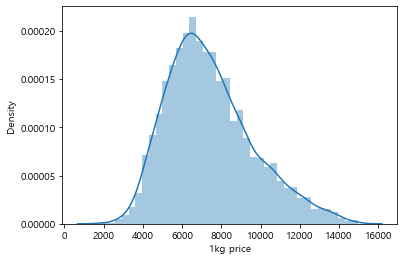

In [30]:
sns.distplot(grouped['1kg price'])

In [53]:
grouped['temp_sc'] = scale.fit_transform(grouped[['temp']])
grouped['qty_sc'] = scale.fit_transform(grouped[['qty']])

In [54]:
grouped

,qty,1kg price,temp,temp_sc,qty_sc
date,,,,,
2006.04.04,978.3,4948.71,12.02,-0.853048,-0.652525
2006.04.05,4600.7,4447.32,11.90,-0.876107,0.042461
2006.04.06,3842.2,4620.74,12.12,-0.833833,-0.103063
2006.04.07,4777.3,4060.83,12.18,-0.822304,0.076343
2006.04.08,4773.5,4547.00,12.17,-0.824225,0.075614
...,...,...,...,...,...
2021.04.03,561.4,4642.59,13.30,-0.607090,-0.732510
2021.04.05,421.1,5653.34,13.32,-0.603247,-0.759428
2021.04.06,290.7,7392.06,13.35,-0.597483,-0.784446


In [55]:
corr = grouped.corr(method = 'pearson')
corr

,qty,1kg price,temp,temp_sc,qty_sc
qty,1.000000,0.241096,-0.553020,-0.553020,1.000000
1kg price,0.241096,1.000000,0.048214,0.048214,0.241096
temp,-0.553020,0.048214,1.000000,1.000000,-0.553020
temp_sc,-0.553020,0.048214,1.000000,1.000000,-0.553020
qty_sc,1.000000,0.241096,-0.553020,-0.553020,1.000000


In [57]:
data_lr

,from,qty,1kg price,temp,date
0,통영,254.0,3200.00,12.075,2006.04.05
1,통영,535.2,4000.00,12.075,2006.04.05
2,통영,70.0,4285.71,12.075,2006.04.05
3,통영,194.7,4454.55,12.075,2006.04.05
4,통영,493.0,3941.18,12.075,2006.04.05
...,...,...,...,...,...
65512,삼천포,2.0,3100.00,13.150,2021.04.02
65513,삼천포,3.6,7833.33,13.150,2021.04.02
65514,삼천포,22.8,6894.74,13.325,2021.04.05
65515,삼천포,30.0,6700.00,13.350,2021.04.06


In [60]:
data_lr['year'] = data_lr['date'].str.split('.').str.get(0)
data_lr['month'] = data_lr['date'].str.split('.').str.get(1)
data_lr['day'] = data_lr['date'].str.split('.').str.get(2)

In [62]:
data_lr['date2'] = data_lr['year'].str.cat(data_lr['month'],sep='.')

In [63]:
data_lr

,from,qty,1kg price,temp,date,year,month,day,date2
0,통영,254.0,3200.00,12.075,2006.04.05,2006,04,05,2006.04
1,통영,535.2,4000.00,12.075,2006.04.05,2006,04,05,2006.04
2,통영,70.0,4285.71,12.075,2006.04.05,2006,04,05,2006.04
3,통영,194.7,4454.55,12.075,2006.04.05,2006,04,05,2006.04
4,통영,493.0,3941.18,12.075,2006.04.05,2006,04,05,2006.04
...,...,...,...,...,...,...,...,...,...
65512,삼천포,2.0,3100.00,13.150,2021.04.02,2021,04,02,2021.04
65513,삼천포,3.6,7833.33,13.150,2021.04.02,2021,04,02,2021.04
65514,삼천포,22.8,6894.74,13.325,2021.04.05,2021,04,05,2021.04
65515,삼천포,30.0,6700.00,13.350,2021.04.06,2021,04,06,2021.04


In [65]:
group = data_lr.groupby(['year','month'])
grouped2 = group.agg({'qty':'sum','1kg price':'mean'}).round(2)

In [66]:
grouped2

qty  1kg price
year month                     
2006 04      79398.5    4936.02
     05      34612.7    5231.31
     06      15556.6    5587.33
     07      14119.5    5494.06
     08      11779.5    5889.41
...              ...        ...
2020 12     134632.1   11078.21
2021 01     121173.1    9193.63
     02      85059.1    8785.29
     03      33416.2    7527.60
     04       3707.0    6674.00

[181 rows x 2 columns]

In [67]:
df = grouped2.reset_index().pivot( 'month','year', 'qty')
df

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,,,
01,NaN,316297.8,308009.9,319591.3,288439.9,344297.5,341035.3,300715.5,319349.5,269650.5,219956.6,197778.5,196652.5,188790.9,127738.4,121173.1
02,NaN,266473.0,255086.1,226840.3,270642.4,197344.1,250013.4,182736.3,172980.0,213294.1,174987.0,125269.3,156748.5,96313.9,79244.6,85059.1
03,NaN,175121.7,173494.4,150147.8,160943.2,165951.2,218023.0,129232.9,112662.4,87414.9,83039.2,80144.2,74501.7,45764.8,40017.8,33416.2
04,79398.5,80941.9,73488.4,72059.4,75300.5,70253.8,82763.5,59047.7,34624.2,33202.6,24744.1,26073.8,15184.3,19522.8,15953.7,3707.0
05,34612.7,21050.0,31259.3,25504.4,24413.4,31366.1,20826.7,19478.5,15500.8,11032.2,9228.3,8696.5,6441.9,6317.4,6801.8,NaN
06,15556.6,11234.5,17125.3,11958.5,12718.1,14156.3,9904.6,9256.4,7241.2,5807.0,4386.3,5200.4,4013.7,3057.8,2637.3,NaN
07,14119.5,11111.1,12011.8,10557.5,10502.7,9990.7,7310.0,8369.9,6509.9,4956.2,4046.0,3805.1,2940.0,2719.5,2473.0,NaN
08,11779.5,11275.8,15320.7,10377.0,10929.2,10741.1,7735.7,7484.1,7771.2,4656.5,4139.5,4255.7,2821.9,2600.3,2078.8,NaN
09,32728.3,36674.7,35957.2,32421.0,27800.1,19051.1,27519.1,23116.2,20884.1,14450.7,11641.5,11844.0,11246.3,7707.9,6449.1,NaN


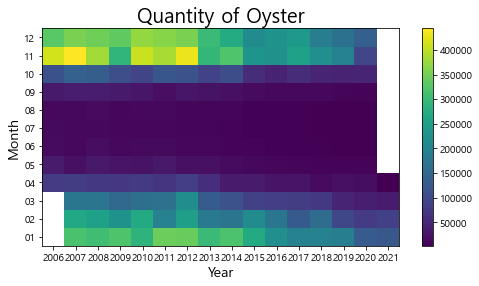

In [68]:
plt.figure(figsize =(8,4))
plt.pcolor(df)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.title('Quantity of Oyster', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.colorbar()

plt.show()


In [70]:
df1 = grouped2.reset_index().pivot( 'month','year', '1kg price')
df1

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,,,
01,NaN,4944.34,4761.71,7637.03,6550.00,8030.88,7590.75,6010.28,7589.58,6841.69,8843.49,8835.77,6928.24,7871.08,9092.51,9193.63
02,NaN,5254.82,5093.07,6407.75,7231.89,7227.96,6398.97,5004.86,6827.18,7068.74,7659.27,5890.84,7603.04,7315.19,8143.48,8785.29
03,NaN,4707.51,4380.56,6556.24,6209.89,6429.64,5698.77,4238.02,6518.81,6486.79,7447.35,5166.34,6264.94,7053.08,8750.54,7527.60
04,4936.02,4527.44,4672.05,6051.80,5776.43,6300.24,5106.26,4348.35,6689.52,6345.41,6598.09,5036.64,6219.59,6929.28,7416.12,6674.00
05,5231.31,4808.74,4939.38,7133.33,6192.42,7142.72,4951.00,4777.04,6955.69,7498.62,7069.62,5342.36,6541.66,7829.12,6400.26,NaN
06,5587.33,5716.24,5829.88,8122.14,6788.65,8324.84,6414.86,5528.58,7977.24,8889.75,7353.73,6428.37,7046.24,10102.76,8821.51,NaN
07,5494.06,5213.10,5303.99,6193.26,6158.18,6710.59,6377.66,4663.88,6652.19,8515.53,6424.57,4666.43,7111.59,9641.66,8764.58,NaN
08,5889.41,5504.72,6432.03,6575.02,6975.91,7910.20,6642.91,4972.57,8094.07,9900.73,7174.28,6884.24,7309.68,9652.92,7536.39,NaN
09,5988.83,5294.71,6268.87,6195.88,6844.76,8955.13,7220.43,5579.93,7501.94,9060.45,8120.85,6460.74,7435.11,8600.76,9500.60,NaN


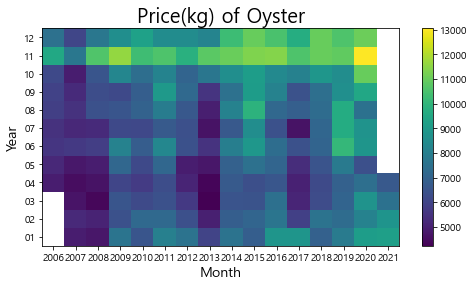

In [71]:
plt.figure(figsize =(8,4))
plt.pcolor(df1)
plt.xticks(np.arange(0.5, len(df1.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df1.index), 1), df.index)
plt.title('Price(kg) of Oyster', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.colorbar()

plt.show()


In [72]:
data_lr

,from,qty,1kg price,temp,date,year,month,day,date2
0,통영,254.0,3200.00,12.075,2006.04.05,2006,04,05,2006.04
1,통영,535.2,4000.00,12.075,2006.04.05,2006,04,05,2006.04
2,통영,70.0,4285.71,12.075,2006.04.05,2006,04,05,2006.04
3,통영,194.7,4454.55,12.075,2006.04.05,2006,04,05,2006.04
4,통영,493.0,3941.18,12.075,2006.04.05,2006,04,05,2006.04
...,...,...,...,...,...,...,...,...,...
65512,삼천포,2.0,3100.00,13.150,2021.04.02,2021,04,02,2021.04
65513,삼천포,3.6,7833.33,13.150,2021.04.02,2021,04,02,2021.04
65514,삼천포,22.8,6894.74,13.325,2021.04.05,2021,04,05,2021.04
65515,삼천포,30.0,6700.00,13.350,2021.04.06,2021,04,06,2021.04


# 1kg price만을 이용해 시계열 데이터 처리 및 선형회귀 분석

In [102]:
data_lr

,from,qty,1kg price,temp,date,year,month,day,date2
0,통영,254.0,3200.00,12.075,2006.04.05,2006,04,05,2006.04
1,통영,535.2,4000.00,12.075,2006.04.05,2006,04,05,2006.04
2,통영,70.0,4285.71,12.075,2006.04.05,2006,04,05,2006.04
3,통영,194.7,4454.55,12.075,2006.04.05,2006,04,05,2006.04
4,통영,493.0,3941.18,12.075,2006.04.05,2006,04,05,2006.04
...,...,...,...,...,...,...,...,...,...
65512,삼천포,2.0,3100.00,13.150,2021.04.02,2021,04,02,2021.04
65513,삼천포,3.6,7833.33,13.150,2021.04.02,2021,04,02,2021.04
65514,삼천포,22.8,6894.74,13.325,2021.04.05,2021,04,05,2021.04
65515,삼천포,30.0,6700.00,13.350,2021.04.06,2021,04,06,2021.04


In [128]:
group = data_lr.groupby(['date2'])
grouped_lr = group.agg({'qty':'sum','1kg price':'mean'}).round(2)
grouped_lr

,qty,1kg price
date2,,
2006.04,79398.5,4936.02
2006.05,34612.7,5231.31
2006.06,15556.6,5587.33
2006.07,14119.5,5494.06
2006.08,11779.5,5889.41
...,...,...
2020.12,134632.1,11078.21
2021.01,121173.1,9193.63
2021.02,85059.1,8785.29


In [132]:
y= grouped_lr['1kg price'].values

In [133]:
ratio = 0.75
cut = np.int(len(y)*ratio)
cut

135

In [134]:
train = y[:cut]
test = y[cut:]
len(y), len(train)

(181, 135)

In [135]:
def split_seq(data,n_steps) :
    x,y = [], []
    for i in range(len(data)) : 
        if i > len(data)-(n_steps+1) : break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x), np.array(y)

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# 모델만들기
lr = LinearRegression()

n_steps = 10

# 훈련데이터
train_x, train_y = split_seq(train,n_steps) # 사용자정의함수

# 검증데이터
test_x, test_y = split_seq(test,n_steps)

In [137]:
len(train_x)

125

In [138]:
lr.fit(train_x,train_y)

LinearRegression()

In [139]:
lr.score(test_x,test_y).round(4)

0.2817

In [593]:
y_pred = lr.predict(test_x)
mse = mean_squared_error(test_y,y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(test_y,y_pred)))

MSE : 0.195, RMSE : 0.442
Variance Score : 0.776


In [113]:
lr.coef_

array([ 0.04541969,  0.03763803,  0.01923597, -0.04399854,  0.02360759,
        0.04122829, -0.03893576, -0.07202641,  0.07381488,  0.86001737])

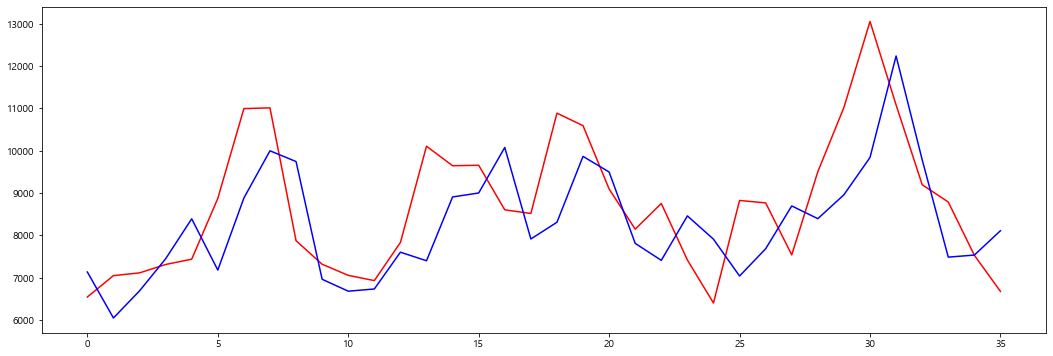

In [141]:
plt.figure(figsize=[18,6])
plt.plot(test_y,c='r')
plt.plot(y_pred,c='b')
plt.show()

In [595]:
grouped_lr['1kg price_sc'] = scale.fit_transform(grouped_lr[['1kg price']])

In [596]:
grouped_lr['1kg price_log'] = np.log(grouped_lr[['1kg price']])

C:\Users\choi yeseul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1kg price_log', ylabel='Density'>

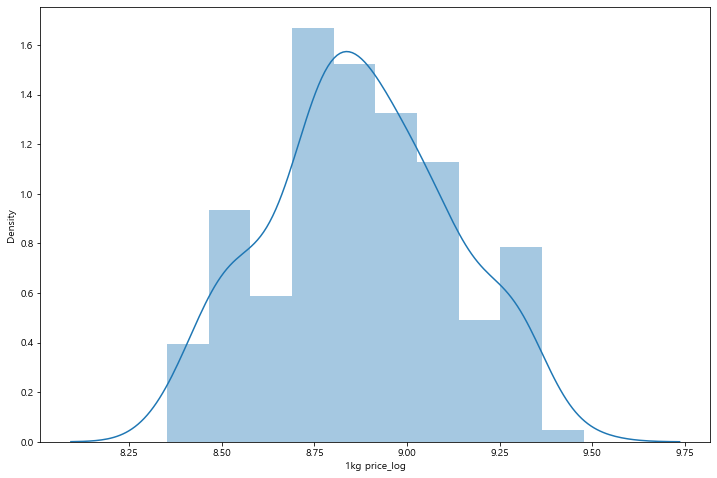

In [597]:
sns.distplot(grouped_lr['1kg price_log'])

In [598]:
grouped_lr

,qty,1kg price,1kg price_sc,1kg price_log
date2,,,,
2006.04,79398.5,4936.02,-1.335711,8.504315
2006.05,34612.7,5231.31,-1.173410,8.562417
2006.06,15556.6,5587.33,-0.977731,8.628257
2006.07,14119.5,5494.06,-1.028995,8.611423
2006.08,11779.5,5889.41,-0.811699,8.680911
2006.09,32728.3,5988.83,-0.757055,8.697651
2006.10,111902.4,6193.19,-0.644732,8.731206
2006.11,413238.2,9521.17,1.184427,9.161273
2006.12,328458.6,7473.42,0.058921,8.919108


# 표준화 스케일링 후 시계열 분석

In [147]:
y= grouped_lr['1kg price_sc'].values
ratio = 0.75
cut = np.int(len(y)*ratio)
cut
train = y[:cut]
test = y[cut:]
len(y), len(train)

(181, 135)

In [599]:
train

2006-04-04    4948.71
2006-04-05    4447.32
2006-04-06    4620.74
2006-04-07    4060.83
2006-04-08    4547.00
               ...   
2017-07-03    4550.08
2017-07-04    5544.34
2017-07-05    6250.78
2017-07-06    5107.33
2017-07-07    3903.41
Freq: D, Name: 1kg price, Length: 4113, dtype: float64

In [594]:
# 모델만들기
lr = LinearRegression()

n_steps = 10

# 훈련데이터
train_x, train_y = split_seq(train,n_steps) # 사용자정의함수

# 검증데이터
test_x, test_y = split_seq(test,n_steps)

lr.fit(train_x,train_y)

y_pred = lr.predict(test_x)
mse = mean_squared_error(test_y,y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(test_y,y_pred)))

KeyError: 10

# 로그 변환 후 시계열 분석

In [149]:
y= grouped_lr['1kg price_log'].values
ratio = 0.75
cut = np.int(len(y)*ratio)
cut
train = y[:cut]
test = y[cut:]
len(y), len(train)

(181, 135)

In [150]:
# 모델만들기
lr = LinearRegression()

n_steps = 10

# 훈련데이터
train_x, train_y = split_seq(train,n_steps) # 사용자정의함수

# 검증데이터
test_x, test_y = split_seq(test,n_steps)

lr.fit(train_x,train_y)

y_pred = lr.predict(test_x)
mse = mean_squared_error(test_y,y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {0:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(test_y,y_pred)))

MSE : 0.024, RMSE : 0.024
Variance Score : 0.220


# 월별 시계열 데이터를 사용하는 경우 예측율이 현저히 낮음
# 일별 데이터를 사용하되 빈 날짜를 채워서 예측

In [151]:
group = data_lr.groupby(['date'])
grouped_day = group.agg({'qty':'sum','1kg price':'mean'}).round(2)
grouped_day

,qty,1kg price
date,,
2006.04.04,978.3,4948.71
2006.04.05,4600.7,4447.32
2006.04.06,3842.2,4620.74
2006.04.07,4777.3,4060.83
2006.04.08,4773.5,4547.00
...,...,...
2021.04.03,561.4,4642.59
2021.04.05,421.1,5653.34
2021.04.06,290.7,7392.06


In [160]:
grouped_day=grouped_day.reset_index()

In [178]:
grouped_day

,date,qty,1kg price
0,2006.04.04,978.3,4948.71
1,2006.04.05,4600.7,4447.32
2,2006.04.06,3842.2,4620.74
3,2006.04.07,4777.3,4060.83
4,2006.04.08,4773.5,4547.00
...,...,...,...
4597,2021.04.03,561.4,4642.59
4598,2021.04.05,421.1,5653.34
4599,2021.04.06,290.7,7392.06
4600,2021.04.07,399.9,7735.17


In [155]:
day_index=pd.date_range('2006.04.04', '2021.04.08', freq='D')

In [164]:
series = pd.DataFrame(index=day_index, columns=['qty','1kg price'])

In [167]:
series = series.reset_index()

In [171]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      5484 non-null   datetime64[ns]
 1   qty        0 non-null      object        
 2   1kg price  0 non-null      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 128.7+ KB


In [173]:
series['index'] = series['index'].astype(str)

In [176]:
series['index'] = series['index'].str.replace('-','.')

In [179]:
series.columns = ['date','qty','1kg price']

In [184]:
series = series.drop(['qty','1kg price'],axis=1)

In [186]:
merge_day = pd.merge(series, grouped_day, how='left', on ='date' )

In [187]:
merge_day.isnull().sum()

date           0
qty          882
1kg price    882
dtype: int64

In [204]:
merge_day = merge_day.fillna(method='ffill')

In [205]:
merge_day.isnull().sum()

date         0
qty          0
1kg price    0
dtype: int64

In [207]:
## MSE를 위해 표준화 진행

In [208]:
merge_day['1kg price_sc'] = scale.fit_transform(merge_day[['1kg price']])

In [209]:
y= merge_day['1kg price_sc'].values
ratio = 0.75
cut = np.int(len(y)*ratio)
cut
train = y[:cut]
test = y[cut:]
len(y), len(train)

(5484, 4113)

In [210]:
# 모델만들기
lr = LinearRegression()

n_steps = 10

# 훈련데이터
train_x, train_y = split_seq(train,n_steps) # 사용자정의함수

# 검증데이터
test_x, test_y = split_seq(test,n_steps)

lr.fit(train_x,train_y)

y_pred = lr.predict(test_x)
mse = mean_squared_error(test_y,y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {0:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(test_y,y_pred)))

MSE : 0.187, RMSE : 0.187
Variance Score : 0.790


In [237]:
# 모델만들기
lr = LinearRegression()

n_steps = 11

# 훈련데이터
train_x, train_y = split_seq(train,n_steps) # 사용자정의함수

# 검증데이터
test_x, test_y = split_seq(test,n_steps)

lr.fit(train_x,train_y)

y_pred = lr.predict(test_x)
mse = mean_squared_error(test_y,y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {0:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(test_y,y_pred)))

MSE : 0.186, RMSE : 0.186
Variance Score : 0.791


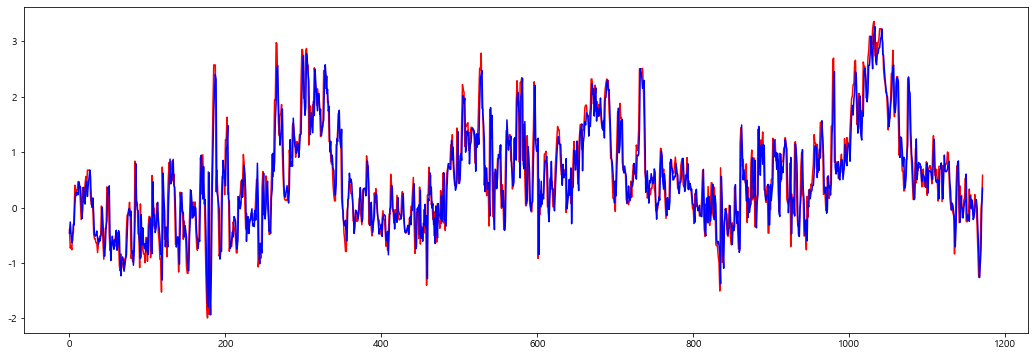

In [239]:
plt.figure(figsize=[18,6])
plt.plot(test_y,c='r')
plt.plot(y_pred,c='b')
plt.show()

In [241]:
merge_day

,date,qty,1kg price,1kg price_sc
0,2006.04.04,978.3,4948.71,-1.116095
1,2006.04.05,4600.7,4447.32,-1.340124
2,2006.04.06,3842.2,4620.74,-1.262637
3,2006.04.07,4777.3,4060.83,-1.512814
4,2006.04.08,4773.5,4547.00,-1.295585
...,...,...,...,...
5479,2021.04.04,561.4,4642.59,-1.252874
5480,2021.04.05,421.1,5653.34,-0.801255
5481,2021.04.06,290.7,7392.06,-0.024367
5482,2021.04.07,399.9,7735.17,0.128940


In [245]:
merge_day[['1kg price']]

,1kg price
0,4948.71
1,4447.32
2,4620.74
3,4060.83
4,4547.00
...,...
5479,4642.59
5480,5653.34
5481,7392.06
5482,7735.17


In [259]:
merge_day.index=pd.date_range('2006.04.04', '2021.04.08', freq='D')

In [260]:
merge_day

,date,qty,1kg price,1kg price_sc
2006-04-04,2006.04.04,978.3,4948.71,-1.116095
2006-04-05,2006.04.05,4600.7,4447.32,-1.340124
2006-04-06,2006.04.06,3842.2,4620.74,-1.262637
2006-04-07,2006.04.07,4777.3,4060.83,-1.512814
2006-04-08,2006.04.08,4773.5,4547.00,-1.295585
...,...,...,...,...
2021-04-04,2021.04.04,561.4,4642.59,-1.252874
2021-04-05,2021.04.05,421.1,5653.34,-0.801255
2021-04-06,2021.04.06,290.7,7392.06,-0.024367
2021-04-07,2021.04.07,399.9,7735.17,0.128940


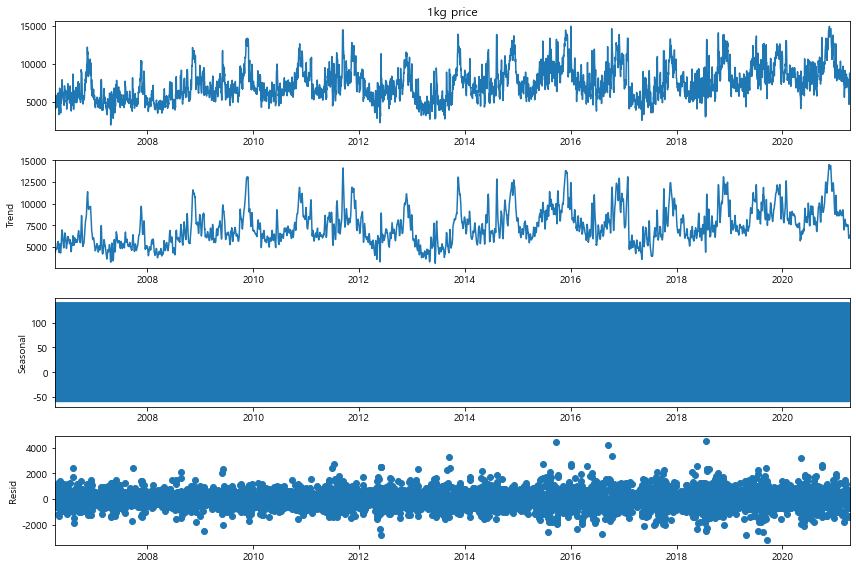

<Figure size 1440x720 with 0 Axes>

In [411]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(y, model='addictive').plot()
plt.figure(figsize=(20,10))
plt.show()

# ARIMA

In [268]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [587]:
y = merge_day['1kg price']
y

2006-04-04    4948.71
2006-04-05    4447.32
2006-04-06    4620.74
2006-04-07    4060.83
2006-04-08    4547.00
               ...   
2021-04-04    4642.59
2021-04-05    5653.34
2021-04-06    7392.06
2021-04-07    7735.17
2021-04-08    8752.01
Freq: D, Name: 1kg price, Length: 5484, dtype: float64

In [274]:
merge_day['1kg price'].diff().dropna()

2006-04-05    -501.39
2006-04-06     173.42
2006-04-07    -559.91
2006-04-08     486.17
2006-04-09       0.00
               ...   
2021-04-04       0.00
2021-04-05    1010.75
2021-04-06    1738.72
2021-04-07     343.11
2021-04-08    1016.84
Freq: D, Name: 1kg price, Length: 5483, dtype: float64

In [ ]:
# ADF 검정을 통해 정상성을 확인 가능

In [275]:
y = merge_day['1kg price']
y_1diff = merge_day['1kg price'].diff().dropna()
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

원 데이터 ADF Statistic: -6.292
원 데이터 p-value: 0.000
1차 차분 ADF Statistic: -22.637
1차 차분 p-value: 0.000


In [ ]:
# 차분하지 않아도 됨을 알게 됨 / 안정적인 시계열 데이터

In [ ]:
#ARIMA의 모수는 크게 3가지가 있다. 
# AR모형의 Lag을 의미하는 p, MA모형의 Lag을 의미하는 q, 차분(Diffrence)횟수를 의미하는 d 가 그것이다. 보통은 p, d, q의 순서로 쓴다.
# 통상적으로 p + q < 2, p * q = 0 인 값들을 많이 사용한다.
# 여기서 p * q = 0 이라 하면, 두 값중 하나는 0이라는 이야기이다.
# 실제로 대부분의 시계열 자료에서는 하나의 경향만을 강하게 띄기 때문에, 이렇게 사용하는것이 더 잘 맞는다고 한다.
# 시계열 데이터가 AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 처음 시차를 제외하고 급격히 감소한다.
# 반대로, MA의 특성을 띄는 경우 ACF는 급격히 감소하고 PACF는 천천히 감소한다.

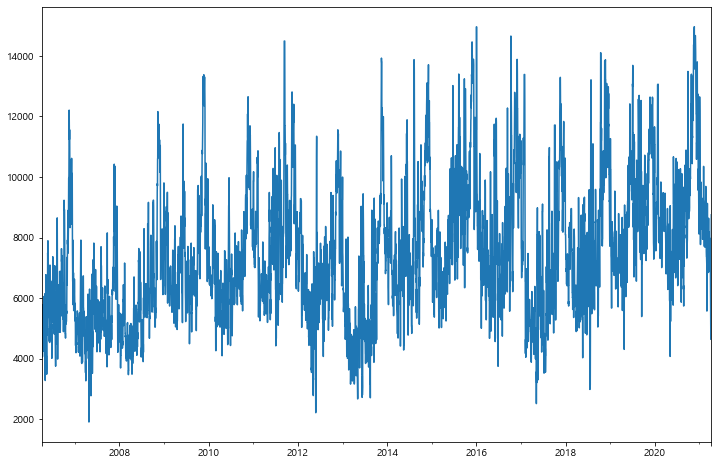

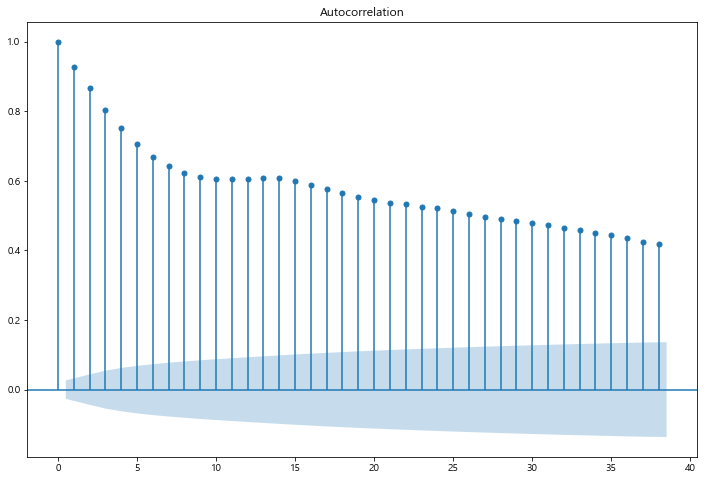

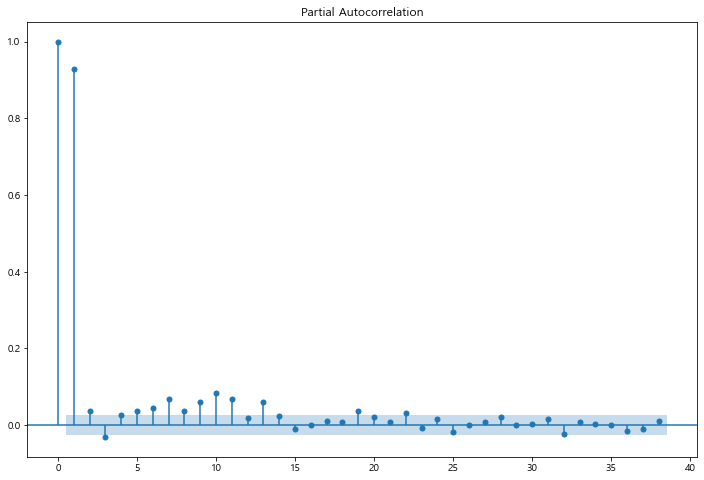

In [457]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

y.plot()
plot_acf(y)
plot_pacf(y)
plt.show()

In [ ]:
# PACF의 1에서 급격히 감소
# AR의 특성을 강하게 띔을 알 수 있음 (0,0,1)

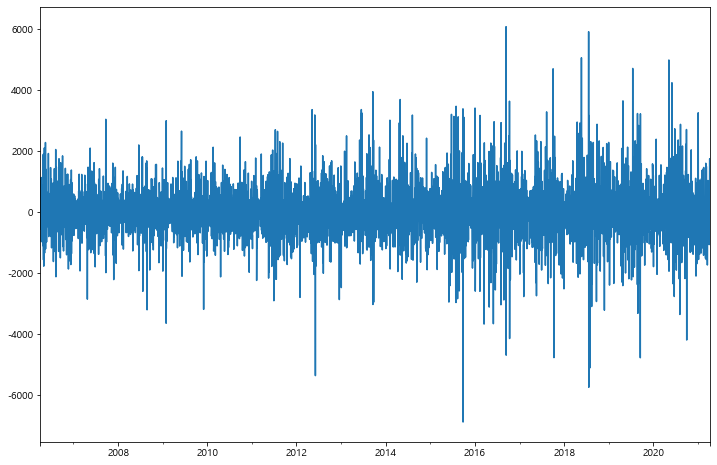

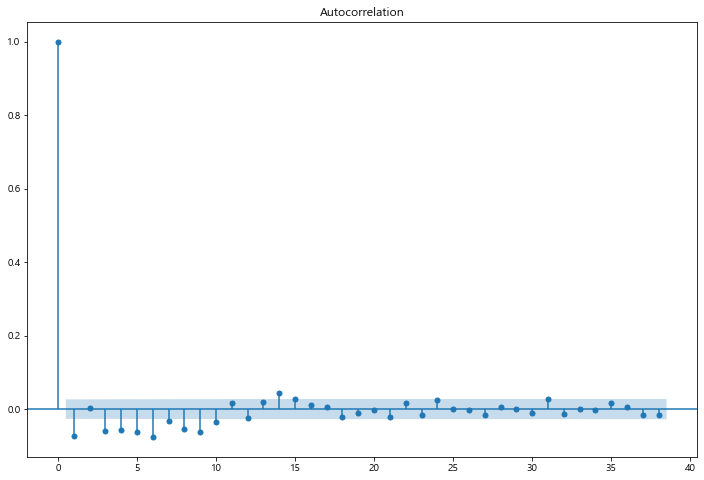

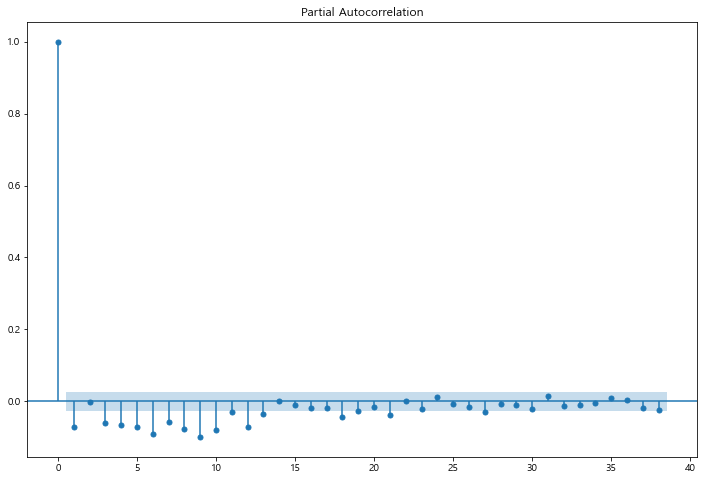

In [456]:
y_1diff.plot()
plot_acf(y_1diff)
plot_pacf(y_1diff)
plt.show()

In [ ]:
# train, test 구분 없이 진행

In [588]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(y, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.1kg price   No. Observations:                 5483
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -44739.952
Method:                       css-mle   S.D. of innovations            846.253
Date:                Mon, 26 Apr 2021   AIC                          89485.904
Time:                        21:16:37   BIC                          89505.732
Sample:                    04-05-2006   HQIC                         89492.821
                         - 04-08-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6937     10.593      0.065      0.948     -20.069      21.456
ma.L1.D.1kg price    -0.0731      0.014     -5.361      0.000      -0.100      -0.046
                        

C:\Users\choi yeseul\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [589]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(y[:5480], order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.1kg price   No. Observations:                 5479
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -44705.384
Method:                       css-mle   S.D. of innovations            845.955
Date:                Mon, 26 Apr 2021   AIC                          89414.768
Time:                        21:16:43   BIC                          89427.985
Sample:                    04-05-2006   HQIC                         89419.379
                         - 04-04-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ma.L1.D.1kg price    -0.0739      0.014     -5.418      0.000      -0.101      -0.047
                                    Roots                                    
                  Real          

C:\Users\choi yeseul\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


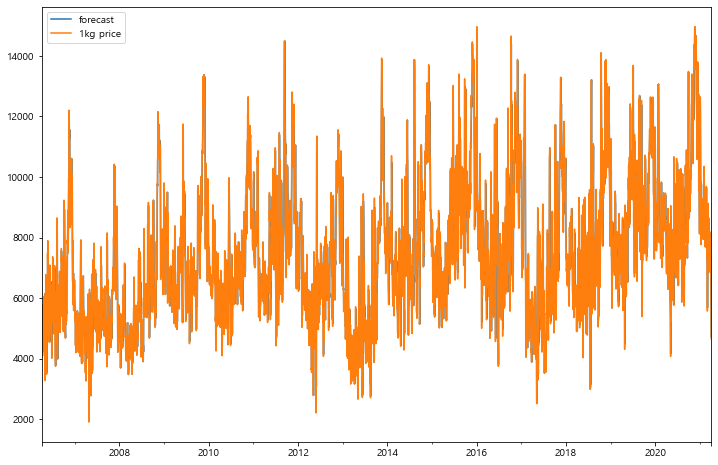

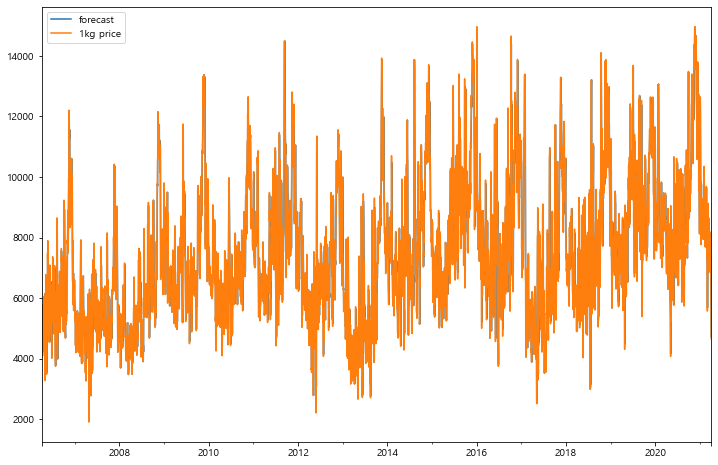

In [590]:
model_fit.plot_predict()

In [592]:
model_fit.predict()

2006-04-05     0.000000
2006-04-06    36.860662
2006-04-07   -10.093981
2006-04-08    40.641646
2006-04-09   -32.932850
                ...    
2021-03-31    17.655939
2021-04-01    16.847236
2021-04-02    58.771767
2021-04-03    83.968010
2021-04-04    77.502808
Freq: D, Length: 5479, dtype: float64

In [520]:
merge_day['predict']=model_fit.predict()

In [521]:
merge_day

,date,qty,1kg price,1kg price_sc,predict
2006-04-04,2006.04.04,978.3,4948.71,-1.116095,NaN
2006-04-05,2006.04.05,4600.7,4447.32,-1.340124,0.000000
2006-04-06,2006.04.06,3842.2,4620.74,-1.262637,36.860662
2006-04-07,2006.04.07,4777.3,4060.83,-1.512814,-10.093981
2006-04-08,2006.04.08,4773.5,4547.00,-1.295585,40.641646
...,...,...,...,...,...
2021-04-04,2021.04.04,561.4,4642.59,-1.252874,77.502808
2021-04-05,2021.04.05,421.1,5653.34,-0.801255,NaN
2021-04-06,2021.04.06,290.7,7392.06,-0.024367,NaN
2021-04-07,2021.04.07,399.9,7735.17,0.128940,NaN


In [522]:
y_1diff[:5480]

2006-04-05    -501.39
2006-04-06     173.42
2006-04-07    -559.91
2006-04-08     486.17
2006-04-09       0.00
               ...   
2021-04-01    -778.24
2021-04-02   -1077.18
2021-04-03    -964.52
2021-04-04       0.00
2021-04-05    1010.75
Freq: D, Name: 1kg price, Length: 5480, dtype: float64

In [536]:
y_pred=model_fit.predict()

In [572]:
y_pred

2006-04-05     0.000000
2006-04-06    36.860662
2006-04-07   -10.093981
2006-04-08    40.641646
2006-04-09   -32.932850
                ...    
2021-03-31    17.655939
2021-04-01    16.847236
2021-04-02    58.771767
2021-04-03    83.968010
2021-04-04    77.502808
Freq: D, Length: 5479, dtype: float64

In [575]:
RMSE  = np.sqrt(np.mean((merge_day['predict'][:5480] - y_1diff[:5480]) ** 2)) 
print('RMSE: %f' % RMSE)

RMSE: 845.955607


In [577]:
merge_day['1kg price'][5480]

5653.34

In [524]:
# 예측값, stderr, upper bound, lower bound 
fore = model_fit.forecast(steps=1)
print(fore)

# 5653.34

(array([4648.31890216]), array([845.95545944]), array([[2990.27666912, 6306.36113519]]))


In [582]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.1kg price   No. Observations:                 5479
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -44705.384
Method:                       css-mle   S.D. of innovations            845.955
Date:                Mon, 26 Apr 2021   AIC                          89414.768
Time:                        18:20:37   BIC                          89427.985
Sample:                    04-05-2006   HQIC                         89419.379
                         - 04-04-2021                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ma.L1.D.1kg price    -0.0739      0.014     -5.418      0.000      -0.101      -0.047
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           13.5284           +0.0000j           13.5284            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# c=0이고  d=0 이면, 장기 예측값이 0에 가까워질 것입니다.
# c=0이고  d=1 이면, 장기 예측값이 0이 아닌 상수에 가까워질 것입니다.
# c=0 이고  d=2 이면, 장기 예측값이 직선 형태로 나타나게 될 것입니다.

# AutoArima로 구해서 진행

In [318]:
ratio = 0.75
cut = np.int(len(y)*ratio)
cut
train = y[:cut]
test = y[cut:]
len(y), len(train)

(5484, 4113)

In [364]:
import itertools

In [393]:
from pmdarima import auto_arima
stepwise_model = auto_arima(y, start_p=1, start_q=1,
                           max_p=2, max_q=2, m=12,
                           start_P=0,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=20.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=93248.304, Time=0.32 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=91465.787, Time=7.97 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.50 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=93206.809, Time=0.77 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=90827.118, Time=17.99 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=35.32 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=13.05 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=90853.124, Time=4.23 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=90829.117, Time=25.99 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=38.61 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=90827.027, Time=16.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=91465.272, Time=7.56 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=35.72 sec
 ARIMA(0,1,1)(1,1,1)[12]         